Combine the files into a single dataset. Hint: use concat()
Check for missing values.  If there are any missing values, deal with them appropriately.
Provide written justification explaining why you selected particular methods for dealing with missing values
Check for outliers (Hint: box plot).  Do we keep them or do we drop them?  Why? 
Provide written justification explaining why you decided to keep or drop outliers.
Center and scale data as needed
Generate a density plot for every field that contains continuous data 
Review distributions
Chose centering and scaling approach
Provide written justification explaining why you needed (or did not need) to center and/or scale the data.
Transform data as needed
Choose transformation approach
Provide written justification explaining why you needed (or did not need) to transform the data
Convert columns that contain discrete data to dummy variables
Create and train a linear regression model that estimates the average mean temperature
Evaluate your model using the accuracy score and RSME score.  
Provide written justification explaining what those scores mean in the context of your problem 
Play with parameters - will adding or removing parameters improve your model’s accuracy?  Build three models with three different sets of parameters to compare the results. 
Write a paragraph explaining whether or not your BEST model is “good” and why

In [107]:
#load tools
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn import preprocessing as prep

In [108]:
#load file 1
test_data = pd.read_csv("DailyDelhiClimateTest.csv")
test_data

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [109]:
#load file 2
train_data = pd.read_csv("DailyDelhiClimateTrain.csv")
train_data

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [110]:
test_train = pd.concat([test_data, train_data])
test_train

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [111]:
#check for null values in the columns
test_train.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

There are no missing values in the data

Let's start by looking at meantemp

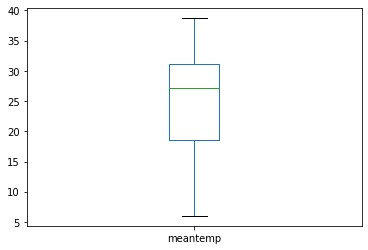

In [112]:
#check for outliers
test_train["meantemp"].plot.box()

The meantemp column does not have any significant outliers

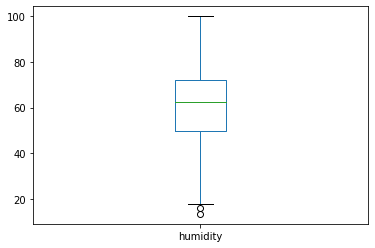

In [113]:
#check for outliers
test_train["humidity"].plot.box()

There are a couple outliers outside of the minimum, as shown above. When we look at the data, it is only a couple of points that are just slightly lower and does not necessarily warrant removal.

Now let's move onto the wind_speed

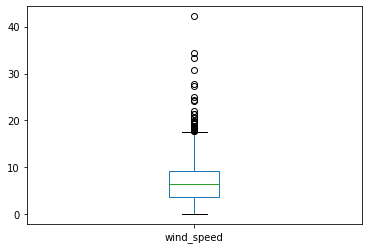

In [114]:
#check for outliers
test_train["wind_speed"].plot.box()

There are a significant number of outliers above the maximum here. When we take a look at the data, there are data points that are significantly higher than the median (i.e. 42.22, 34.4875, etc). However, since the difference between the points is not impossibly drastic, we can assume that no mistakes were made in recording the wind speed. However, there is a seemingly large number of outliers on the higher end, so data analysis will most likely be skewed if we proceed without dropping some values. 

In [115]:
#lets take a look at the data
test_train.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1576.000000,1576.000000,1576.000000,1576.000000
mean,25.221918,60.445229,6.899262,1010.593178
std,7.345014,16.979994,4.510725,175.242704
min,6.000000,13.428571,0.000000,-3.041667
25%,18.500000,49.750000,3.700000,1001.875000
50%,27.166667,62.440476,6.363571,1009.055556
75%,31.142857,72.125000,9.262500,1015.200000
max,38.714286,100.000000,42.220000,7679.333333


In [116]:
#locate the outlier
    #i will use the outliers formula 

Q1 = np.percentile(test_train.wind_speed, 25)
Q3 = np.percentile(test_train.wind_speed, 75)
IQR = Q3 - Q1

lower_cut = Q1 - (1.5*IQR)
higher_cut = Q3 + (1.5*IQR)

In [117]:
#uncomment to see the outliers
#test_train.loc[test_train['wind_speed'] <= lower_cut ] 
#test_train.loc[test_train['wind_speed'] >= higher_cut ]

In [118]:
#now we can drop them outliers
    #i considered replacing the outlier with the median/mean, like what one would do for null values
    #however, the rubric mentions "dropping" the outliers, so instead, i will drop the outlier row
    #this actually took forever, since i didn't realize that i needed to .index it....

test_train.drop(test_train.loc[test_train['wind_speed'] <= lower_cut ].index, inplace=True)
test_train.drop(test_train.loc[test_train['wind_speed'] >= higher_cut ].index, inplace=True)

In [119]:
#let's take a look at the data again
    #the max has been scaled down significantly
test_train.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1541.000000,1541.000000,1541.000000,1541.000000
mean,25.163009,60.654980,6.572835,1010.691495
std,7.331027,16.892764,3.874195,177.218222
min,6.000000,13.428571,0.000000,-3.041667
25%,18.500000,49.937500,3.487500,1001.875000
50%,27.125000,62.714286,6.250000,1009.142857
75%,31.125000,72.285714,9.066667,1015.250000
max,38.714286,100.000000,17.600000,7679.333333


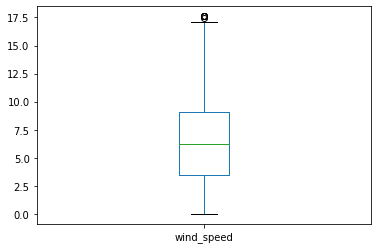

In [120]:
#now it looks like a more even box plot
test_train["wind_speed"].plot.box()

Now we move onto meanpressure

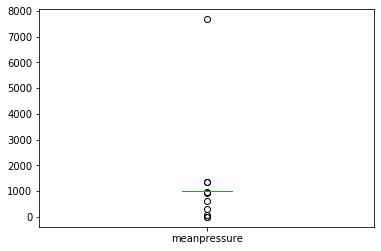

In [121]:
#check for outliers
test_train["meanpressure"].plot.box()

In [122]:
#lets take a look at the data
test_train.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1541.000000,1541.000000,1541.000000,1541.000000
mean,25.163009,60.654980,6.572835,1010.691495
std,7.331027,16.892764,3.874195,177.218222
min,6.000000,13.428571,0.000000,-3.041667
25%,18.500000,49.937500,3.487500,1001.875000
50%,27.125000,62.714286,6.250000,1009.142857
75%,31.125000,72.285714,9.066667,1015.250000
max,38.714286,100.000000,17.600000,7679.333333


In this one, there are a clear outliers that must be a mistake in record-keeping. For example, assuming that these values are millibars, it should never be a negative number, and the record low is 870 mbar and the record high is 1083 mbar. Even without the research, it is clear that this column has many outliers that need to be dropped.

In [123]:
#locate the outlier
    #you can define the lower cutoff as 870 mbar ad the highest as 1083 mbar
    #but for the purpose of this assignment and our course's emphasis on machine learning
    #i will use the outliers formula and assume that no prior research was done

#we can use the 1st and 3rd quartiles from the statistics
Q1 = np.percentile(test_train.meanpressure, 25)
Q3 = np.percentile(test_train.meanpressure, 75)
IQR = Q3 - Q1

lower_cut = Q1 - (1.5*IQR)
higher_cut = Q3 + (1.5*IQR)

In [124]:
#uncomment to see the outliers
#test_train.loc[test_train['meanpressure'] <= lower_cut ] 
#test_train.loc[test_train['meanpressure'] >= higher_cut ]

In [125]:
#now we can drop the outliers

test_train.drop(test_train.loc[test_train['meanpressure'] <= lower_cut ].index, inplace=True)
test_train.drop(test_train.loc[test_train['meanpressure'] >= higher_cut ].index, inplace=True)

In [126]:
#let's take a look at the data again
    #it looks like the min and max have been adjusted to be more reasonable for meanpressure
test_train.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1530.000000,1530.000000,1530.000000,1530.000000
mean,25.157386,60.622484,6.571317,1008.615008
std,7.330363,16.894633,3.872887,7.396034
min,6.000000,13.428571,0.000000,993.125000
25%,18.500000,49.937500,3.495625,1002.000000
50%,27.125000,62.675439,6.250000,1009.200000
75%,31.125000,72.276786,9.052778,1015.200000
max,38.714286,100.000000,17.600000,1023.000000


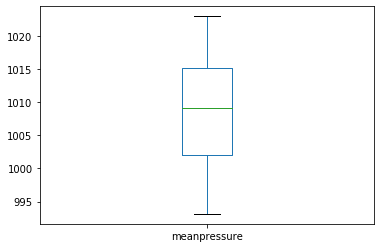

In [127]:
#now it looks like a normal box plot!
test_train["meanpressure"].plot.box()

Time to center and scale the data

In [128]:
#isolate numeric data
test_train_num = test_train[['meantemp', 'humidity','wind_speed','meanpressure']]
test_train_num

,meantemp,humidity,wind_speed,meanpressure
1,18.500000,77.222222,2.894444,1018.277778
2,17.111111,81.888889,4.016667,1018.333333
3,18.700000,70.050000,4.545000,1015.700000
4,18.388889,74.944444,3.300000,1014.333333
5,19.318182,79.318182,8.681818,1011.772727
...,...,...,...,...
1457,17.217391,68.043478,3.547826,1015.565217
1458,15.238095,87.857143,6.000000,1016.904762
1459,14.095238,89.666667,6.266667,1017.904762
1460,15.052632,87.000000,7.325000,1016.100000


In [129]:
#center and scale the data
scaled_data = prep.scale(test_train_num)

#remake the dataframe
scaled_test_train_num = pd.DataFrame(scaled_data,    
                           index=test_train_num.index,
                           columns=test_train_num.columns)

scaled_test_train_num.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1.530000e+03,1.530000e+03,1.530000e+03,1.530000e+03
mean,-1.033306e-16,-3.279875e-17,-2.358317e-16,7.937296e-15
std,1.000327e+00,1.000327e+00,1.000327e+00,1.000327e+00
min,-2.614284e+00,-2.794340e+00,-1.697304e+00,-2.095052e+00
25%,-9.084902e-01,-6.326552e-01,-7.944195e-01,-8.946918e-01
50%,2.685075e-01,1.215549e-01,-8.299277e-02,7.912122e-02
75%,8.143616e-01,6.900482e-01,6.409359e-01,8.906321e-01
max,1.850022e+00,2.331533e+00,2.848596e+00,1.945596e+00


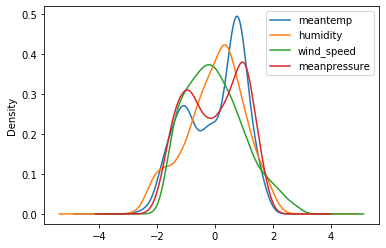

In [130]:
scaled_test_train_num.plot.density()

Meantemp normalization

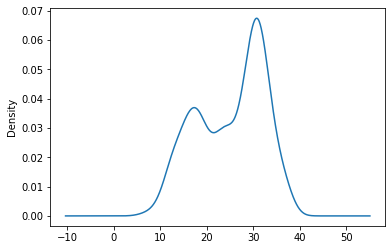

In [131]:
test_train_num['meantemp'].plot.density()

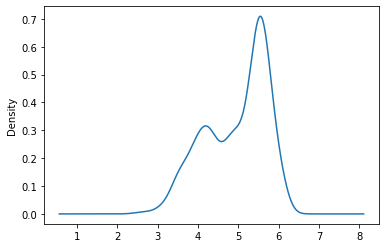

In [132]:
#try sqrt to reach normal distribution for humidity
#get the square root of data points
sqrt_meantemp = test_train_num["meantemp"].apply(np.sqrt) 

#plot density
sqrt_meantemp.plot.density()

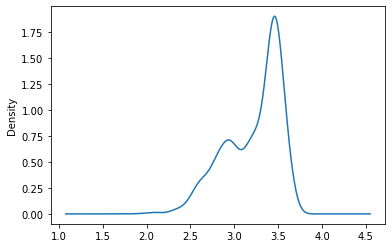

In [133]:
#try log to reach normal distribution for age
#get the log of the data
log_meantemp = (test_train_num["meantemp"] + 1).apply(np.log) 

#plot density
log_meantemp.plot.density()

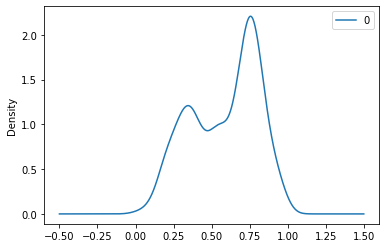

In [134]:
#try min max normalization
x = test_train_num[['meantemp']].values.astype(float)

#minimum and maximum processor object
min_max_scaler = prep.MinMaxScaler()

#object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

#run the normalizer on the dataframe
meantemp_normalized = pd.DataFrame(x_scaled)

meantemp_normalized.plot.density()

Scaling and normalizing meantemp does not result in much change

Humidity transformation

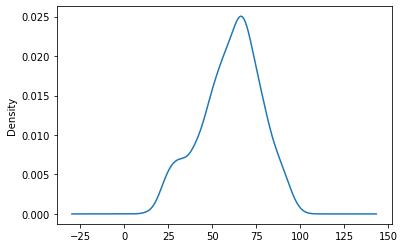

In [135]:
test_train_num['humidity'].plot.density()

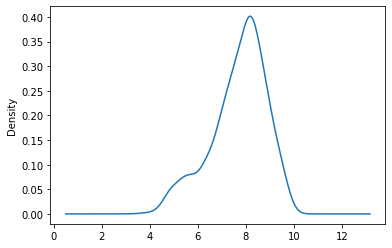

In [136]:
#try sqrt to reach normal distribution for humidity
#get the square root of data points
sqrt_humidity = test_train_num["humidity"].apply(np.sqrt) 

#plot density
sqrt_humidity.plot.density()

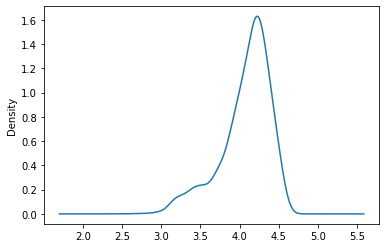

In [137]:
#try log to reach normal distribution for age
#get the log of the data
log_humidity = (test_train_num["humidity"] + 1).apply(np.log) 

#plot density
log_humidity.plot.density()

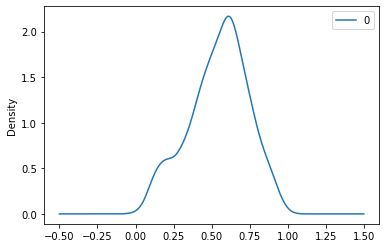

In [138]:
#try min max normalization
x = test_train_num[['humidity']].values.astype(float)

#minimum and maximum processor object
min_max_scaler = prep.MinMaxScaler()

#object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

#run the normalizer on the dataframe
humidity_normalized = pd.DataFrame(x_scaled)

humidity_normalized.plot.density()

The data is already pretty normalized

Wind_pressure normalization

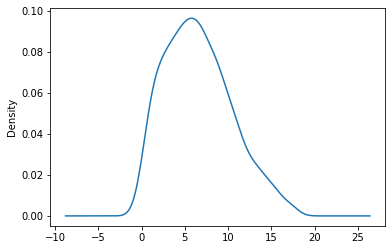

In [139]:
test_train_num['wind_speed'].plot.density()

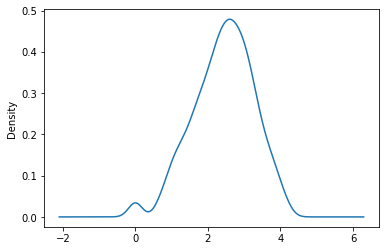

In [140]:
#try sqrt to reach normal distribution for humidity
#get the square root of data points
sqrt_wind_speed = test_train_num["wind_speed"].apply(np.sqrt) 

#plot density
sqrt_wind_speed.plot.density()

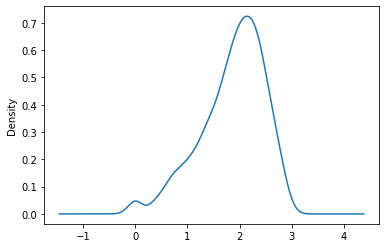

In [141]:
#try log to reach normal distribution for age
#get the log of the data
log_wind_speed = (test_train_num["wind_speed"] + 1).apply(np.log) 

#plot density
log_wind_speed.plot.density()

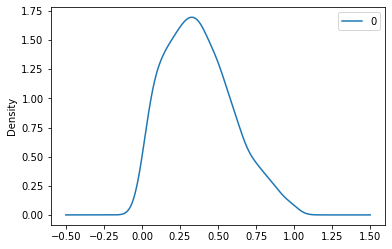

In [142]:
#try min max normalization
x = test_train_num[['wind_speed']].values.astype(float)

#minimum and maximum processor object
min_max_scaler = prep.MinMaxScaler()

#object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

#run the normalizer on the dataframe
wind_speed_normalized = pd.DataFrame(x_scaled)

wind_speed_normalized.plot.density()

Taking the square root of the wind_speed plot works, but the data is already pretty normal

Meanpressure normalization

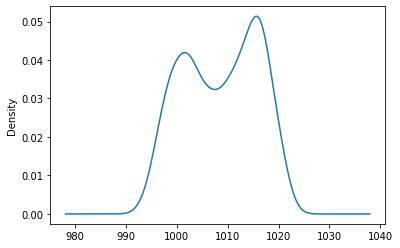

In [143]:
test_train_num['meanpressure'].plot.density()

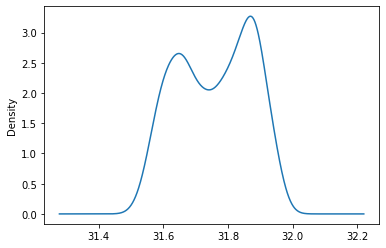

In [144]:
#try sqrt to reach normal distribution for humidity
#get the square root of data points
sqrt_meanpressure = test_train_num["meanpressure"].apply(np.sqrt) 

#plot density
sqrt_meanpressure.plot.density()

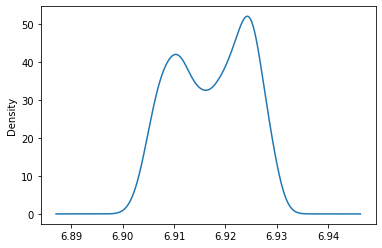

In [145]:
#try log to reach normal distribution for age
#get the log of the data
log_meanpressure = (test_train_num["meanpressure"] + 1).apply(np.log) 

#plot density
log_meanpressure.plot.density()

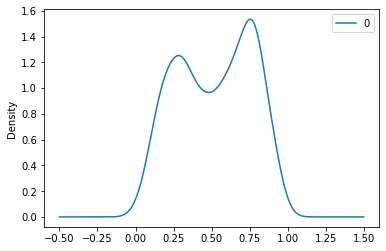

In [146]:
#try min max normalization
x = test_train_num[['meanpressure']].values.astype(float)

#minimum and maximum processor object
min_max_scaler = prep.MinMaxScaler()

#object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

#run the normalizer on the dataframe
meanpressure_normalized = pd.DataFrame(x_scaled)

meanpressure_normalized.plot.density()

Scaling and normalizing meanpressure does not result in much change

Convert columns that contain discrete data to dummy variables

In [147]:
#there are no categorical data points in the file, date can be considered discrete
#however, there is no legitimate reason to convert dates to dummy variables here

In [148]:
test_train

,date,meantemp,humidity,wind_speed,meanpressure
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
5,2017-01-06,19.318182,79.318182,8.681818,1011.772727
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


Create a linear regression model to estimate average mean temperature

In [149]:
#let's see if any of these columns are highly correlated
test_train.corr()

,meantemp,humidity,wind_speed,meanpressure
meantemp,1.000000,-0.576330,0.321924,-0.879967
humidity,-0.576330,1.000000,-0.410061,0.340697
wind_speed,0.321924,-0.410061,1.000000,-0.308099
meanpressure,-0.879967,0.340697,-0.308099,1.000000


In [150]:
#let's try making a model with all the variables: model 1
X = test_train[['humidity','wind_speed','meanpressure']]
y = test_train[['meantemp']]

In [151]:
#split our data into a training and test set using an 80/20 split,
#where 80% of our data will be used for training our model, and 20% will be used for testing
    
from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [152]:
#train model using training subset

from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [153]:
#view the coefficients of the model

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for humidity is -0.14060598282148504
The coefficient for wind_speed is -0.10264829390174424
The coefficient for meanpressure is -0.7814556395786453


In [154]:
# regression_model.intercept_ returns an array of intercepts
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 822.5807130973632


ŷ = 908.498 + (-0.8758)x ends up being our model

Evaluate its accuracy

In [155]:
regression_model.score(X_test, y_test)

#86.4% of the variability in Y can be explained using X, decently high positive correlation

0.8640140991859477

In [156]:
test_train['meantemp'].var()

53.73421667252424

In [157]:
#further accuracy examination
import statsmodels.formula.api as sm
lm = sm.ols(formula='meantemp ~ humidity+wind_speed+meanpressure', data=test_train)
fit = lm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               meantemp   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     3214.
Date:                Mon, 02 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:49:03   Log-Likelihood:                -3695.7
No. Observations:                1530   AIC:                             7399.
Df Residuals:                    1526   BIC:                             7421.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      818.3362     10.224     80.039      0.000     798.281     838.391
humidity        -0.1441      0.005    -31.016      0.000      -0.153      -0.135
wind_speed      -0.1056      0.020     -5.275      0.000      -0.145      -0.066
meanpressure    -0.7771      0.010    -76.376      0.000      -0.797      -0.757
==============================================================================
Omnibus:                       11.000   Durbin-Watson:                   0.335
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.002
Skew:                          -0.200   Prob(JB):                      0.00408
Kurtosis:                       3.112   Cond. No.                     1.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [158]:
#mean squared error 

from sklearn.metrics import mean_squared_error

y_predict = regression_model.predict(X_test)

regression_model_mse = mean_squared_error(y_predict, y_test)

regression_model_mse

7.1263387558608935

In [159]:
# Root Mean Squared Error (RMSE)
import math

math.sqrt(regression_model_mse)
# the data is not very concentrated around the line of best fit

2.6695203231780975

Play with parameters - will adding or removing parameters improve your model’s accuracy?  Build three models with three different sets of parameters to compare the results. 

In [160]:
#let's try a simple linear regression model, using meanpressure, as it has a -.87 correlation with meantemp
#model 2
X = test_train[['meanpressure']]
y = test_train[['meantemp']]

In [161]:
#split our data into a training and test set using an 80/20 split,
#where 80% of our data will be used for training our model, and 20% will be used for testing
    
from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

#train model using training subset

from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [162]:
#view the coefficients of the model

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for meanpressure is -0.8758083740738808


In [163]:
# regression_model.intercept_ returns an array of intercepts
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 908.4979691838555


In [164]:
regression_model.score(X_test, y_test)

#74.4% of the variability in Y can be explained using X, average positive correlation

0.7443685834152527

In [165]:
#mean squared error 

from sklearn.metrics import mean_squared_error

y_predict = regression_model.predict(X_test)

regression_model_mse = mean_squared_error(y_predict, y_test)

regression_model_mse

13.396359919066377

In [166]:
# Root Mean Squared Error (RMSE)
import math

math.sqrt(regression_model_mse)
# the data is not very concentrated around the line of best fit

3.6601038126078307

In [167]:
#further accuracy examination
import statsmodels.formula.api as sm
lm = sm.ols(formula='meantemp ~ meanpressure', data=test_train)
fit = lm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               meantemp   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     5243.
Date:                Mon, 02 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:49:06   Log-Likelihood:                -4079.4
No. Observations:                1530   AIC:                             8163.
Df Residuals:                    1528   BIC:                             8173.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      904.8248     12.149     74.480      0.000     880.995     928.655
meanpressure    -0.8722      0.012    -72.411      0.000      -0.896      -0.849
==============================================================================
Omnibus:                       18.186   Durbin-Watson:                   0.293
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.484
Skew:                          -0.230   Prob(JB):                     0.000160
Kurtosis:                       2.748   Cond. No.                     1.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [168]:
#let's try making a model with two of the variables: model 3
#i'll go with humidity and meanpressure for this one, since wind_speed only has a .33 correlation with meantemp
X = test_train[['humidity','meanpressure']]
y = test_train[['meantemp']]

In [169]:
#split our data into a training and test set using an 80/20 split,
#where 80% of our data will be used for training our model, and 20% will be used for testing
    
from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

#train model using training subset

from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [170]:
#view the coefficients of the model

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for humidity is -0.1322765485959871
The coefficient for meanpressure is -0.7711190630695118


In [171]:
# regression_model.intercept_ returns an array of intercepts
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 810.9682804276647


In [172]:
regression_model.score(X_test, y_test)

#86.1% of the variability in Y can be explained using X, average positive correlation

0.8611001378060945

In [173]:
#mean squared error 

from sklearn.metrics import mean_squared_error

y_predict = regression_model.predict(X_test)

regression_model_mse = mean_squared_error(y_predict, y_test)

regression_model_mse

7.279044851051783

In [174]:
# Root Mean Squared Error (RMSE)
import math

math.sqrt(regression_model_mse)
# the data is not very concentrated around the line of best fit

2.697970505964026

In [175]:
#further accuracy examination
import statsmodels.formula.api as sm
lm = sm.ols(formula='meantemp ~ humidity+meanpressure', data=test_train)
fit = lm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               meantemp   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     4723.
Date:                Mon, 02 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:49:08   Log-Likelihood:                -3709.5
No. Observations:                1530   AIC:                             7425.
Df Residuals:                    1527   BIC:                             7441.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      806.5061     10.062     80.151      0.000     786.769     826.244
humidity        -0.1357      0.004    -30.811      0.000      -0.144      -0.127
meanpressure    -0.7665      0.010    -76.170      0.000      -0.786      -0.747
==============================================================================
Omnibus:                        5.591   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.502
Skew:                          -0.133   Prob(JB):                       0.0639
Kurtosis:                       3.126   Cond. No.                     1.45e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The best model here would be the first multivariable linear regression model. The first model has a .863 correlation coefficient, while the other two have a .77 and .861 respectively. So statistically speaking, the first model is more accurate than the other two. However, this does not necessarily mean that it is "good"; logically speaking, there are other factors that influence the temperature of a day besides the humidity, wind_speed, and air pressure. We can always use .predict() to estimate, but with a RMSE of 2.6 and inability to explain 14% of the variability in meantemp, this model should be used with caution. 